### Notebook *NB04 – Comparación de resultados y análisis final*  
**Autor:** Jesús Daniel Romeral Cortina

**Objetivo:**  
Comparar el rendimiento de los distintos modelos predictivos entrenados con y sin variables de sentimiento, analizando el impacto de la incorporación del sentimiento sobre la capacidad predictiva en diferentes horizontes temporales.


In [1]:
import pandas as pd 
import numpy as np 


In [2]:
PATHS = {
    "ml_1d":        "../../resultados/resultados_ml_1d.csv",
    "ml_5d":        "../../resultados/resultados_ml_5d.csv",
    "lstm_1d":      "../../resultados/resultados_lstm_1d.csv",
    "lstm_5d":      "../../resultados/resultados_lstm_5d.csv",
    "ml_1d_sent":   "../../resultados/resultados_ml_1d_SENT.csv",
    "ml_5d_sent":   "../../resultados/resultados_ml_5d_SENT.csv",
    "lstm_1d_sent": "../../resultados/resultados_lstm_1d_SENT.csv",
    "lstm_5d_sent": "../../resultados/resultados_lstm_5d_SENT.csv",
}


In [8]:
dfs = []

for name, path in PATHS.items():
    df = pd.read_csv(path)
    
    df["family"] = "LSTM" if "lstm" in name else "ML"
    df["horizonte"] = "1d" if "1d" in name else "5d"
    df["con_sentimiento"] = "sent" in name.lower()
    
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)
df_all


,Modelo,tipo:modelo,horizonte,usa_sentimiento,Acc,B_Acc,F1,ROC,family,con_sentimiento
0,Dummy_MostFreq,ML,1d,0,0.494485,0.500000,0.661747,0.500000,ML,False
1,Logistic_Reg,ML,1d,0,0.503676,0.503981,0.514388,0.493180,ML,False
2,Random_Forest,ML,1d,0,0.492647,0.497979,0.656716,0.493897,ML,False
3,Hist_GB,ML,1d,0,0.500000,0.504481,0.643045,0.518790,ML,False
4,Dummy_MostFreq,ML,5d,0,0.556985,0.500000,0.715466,0.500000,ML,False
5,Logistic_Reg,ML,5d,0,0.522059,0.517467,0.565217,0.517303,ML,False
6,Random_Forest,ML,5d,0,0.555147,0.498774,0.713270,0.463936,ML,False
7,Hist_GB,ML,5d,0,0.555147,0.499623,0.711905,0.463820,ML,False
8,LSTM,LSTM,1d,0,0.496255,0.497980,0.654685,0.489732,LSTM,False
9,LSTM,LSTM,5d,0,0.573034,0.509620,0.724638,0.506437,LSTM,False


In [4]:

metricas = ["Acc", "B_Acc", "F1", "ROC"]

for col in metricas:
    df_all[col] = pd.to_numeric(df_all[col], errors="coerce")

df_all = df_all.rename(columns={
    "Modelo": "modelo",
    "tipo:modelo": "tipo_modelo"
})

df_all = df_all[
    ["family", "modelo", "tipo_modelo", "horizonte", "con_sentimiento",
     "Acc", "B_Acc", "F1", "ROC"]
]

df_all = df_all.sort_values(
    ["horizonte", "family", "modelo", "con_sentimiento"]
).reset_index(drop=True)

df_all


,family,modelo,tipo_modelo,horizonte,con_sentimiento,Acc,B_Acc,F1,ROC
0,LSTM,LSTM,LSTM,1d,False,0.496255,0.497980,0.654685,0.489732
1,LSTM,LSTM,LSTM,1d,True,0.498127,0.499902,0.659033,0.544874
2,ML,Dummy_MostFreq,ML,1d,False,0.494485,0.500000,0.661747,0.500000
3,ML,Dummy_MostFreq,ML,1d,True,0.494485,0.500000,0.661747,0.500000
4,ML,Hist_GB,ML,1d,False,0.500000,0.504481,0.643045,0.518790
5,ML,Hist_GB,ML,1d,True,0.501838,0.505934,0.635262,0.507394
6,ML,Logistic_Reg,ML,1d,False,0.503676,0.503981,0.514388,0.493180
7,ML,Logistic_Reg,ML,1d,True,0.494485,0.495012,0.514991,0.493924
8,ML,Random_Forest,ML,1d,False,0.492647,0.497979,0.656716,0.493897
9,ML,Random_Forest,ML,1d,True,0.490809,0.496283,0.658446,0.484975


In [5]:

df_comp = df_all.pivot_table(
    index=["family", "modelo", "horizonte"],
    columns="con_sentimiento",
    values=["Acc", "B_Acc", "F1", "ROC"],
    aggfunc="first"
)

df_comp.columns = [
    f"{m}_{'sent' if s else 'no_sent'}"
    for m, s in df_comp.columns
]

df_comp = df_comp.reset_index()
df_comp


,family,modelo,horizonte,Acc_no_sent,Acc_sent,B_Acc_no_sent,B_Acc_sent,F1_no_sent,F1_sent,ROC_no_sent,ROC_sent
0,LSTM,LSTM,1d,0.496255,0.498127,0.497980,0.499902,0.654685,0.659033,0.489732,0.544874
1,LSTM,LSTM,5d,0.573034,0.565543,0.509620,0.500000,0.724638,0.722488,0.506437,0.587463
2,ML,Dummy_MostFreq,1d,0.494485,0.494485,0.500000,0.500000,0.661747,0.661747,0.500000,0.500000
3,ML,Dummy_MostFreq,5d,0.556985,0.556985,0.500000,0.500000,0.715466,0.715466,0.500000,0.500000
4,ML,Hist_GB,1d,0.500000,0.501838,0.504481,0.505934,0.643045,0.635262,0.518790,0.507394
5,ML,Hist_GB,5d,0.555147,0.549632,0.499623,0.493824,0.711905,0.708680,0.463820,0.472741
6,ML,Logistic_Reg,1d,0.503676,0.494485,0.503981,0.495012,0.514388,0.514991,0.493180,0.493924
7,ML,Logistic_Reg,5d,0.522059,0.571691,0.517467,0.531456,0.565217,0.697009,0.517303,0.565562
8,ML,Random_Forest,1d,0.492647,0.490809,0.497979,0.496283,0.656716,0.658446,0.493897,0.484975
9,ML,Random_Forest,5d,0.555147,0.553309,0.498774,0.496700,0.713270,0.712426,0.463936,0.445449


In [6]:

for m in ["Acc", "B_Acc", "F1", "ROC"]:
    df_comp[f"delta_{m}"] = (
        df_comp[f"{m}_sent"] - df_comp[f"{m}_no_sent"]
    )

df_comp = df_comp.sort_values(
    ["horizonte", "delta_ROC"],
    ascending=[True, False]
).reset_index(drop=True)

df_comp


,family,modelo,horizonte,Acc_no_sent,Acc_sent,B_Acc_no_sent,B_Acc_sent,F1_no_sent,F1_sent,ROC_no_sent,ROC_sent,delta_Acc,delta_B_Acc,delta_F1,delta_ROC
0,LSTM,LSTM,1d,0.496255,0.498127,0.497980,0.499902,0.654685,0.659033,0.489732,0.544874,0.001873,0.001922,0.004348,0.055143
1,ML,Logistic_Reg,1d,0.503676,0.494485,0.503981,0.495012,0.514388,0.514991,0.493180,0.493924,-0.009191,-0.008969,0.000603,0.000743
2,ML,Dummy_MostFreq,1d,0.494485,0.494485,0.500000,0.500000,0.661747,0.661747,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000
3,ML,Random_Forest,1d,0.492647,0.490809,0.497979,0.496283,0.656716,0.658446,0.493897,0.484975,-0.001838,-0.001697,0.001730,-0.008922
4,ML,Hist_GB,1d,0.500000,0.501838,0.504481,0.505934,0.643045,0.635262,0.518790,0.507394,0.001838,0.001453,-0.007782,-0.011396
5,LSTM,LSTM,5d,0.573034,0.565543,0.509620,0.500000,0.724638,0.722488,0.506437,0.587463,-0.007491,-0.009620,-0.002150,0.081026
6,ML,Logistic_Reg,5d,0.522059,0.571691,0.517467,0.531456,0.565217,0.697009,0.517303,0.565562,0.049632,0.013989,0.131792,0.048259
7,ML,Hist_GB,5d,0.555147,0.549632,0.499623,0.493824,0.711905,0.708680,0.463820,0.472741,-0.005515,-0.005800,-0.003225,0.008922
8,ML,Dummy_MostFreq,5d,0.556985,0.556985,0.500000,0.500000,0.715466,0.715466,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000
9,ML,Random_Forest,5d,0.555147,0.553309,0.498774,0.496700,0.713270,0.712426,0.463936,0.445449,-0.001838,-0.002075,-0.000844,-0.018487


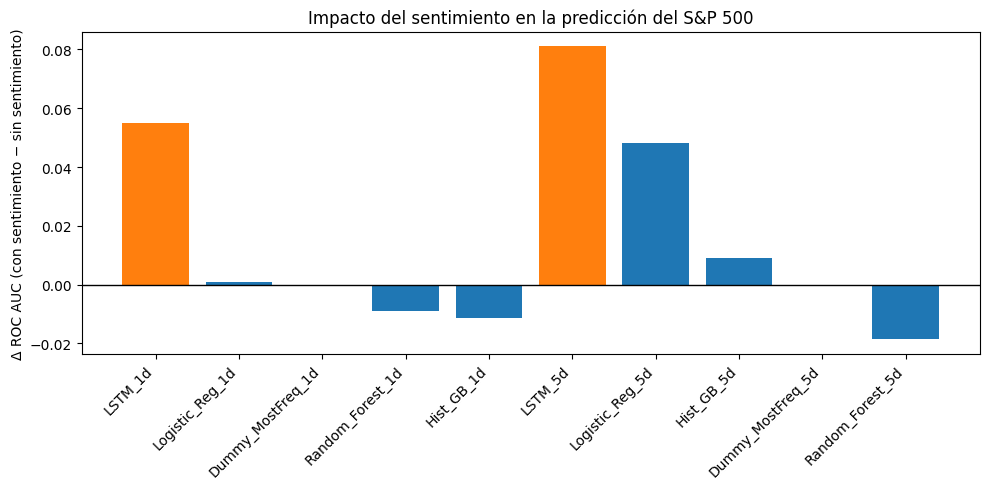

In [ ]:
import matplotlib.pyplot as plt


# Gráfica 1: Impacto del sentimiento 


plt.figure(figsize=(10, 5))

colors = df_comp["family"].map({"ML": "tab:blue", "LSTM": "tab:orange"})

plt.bar(
    x=df_comp["modelo"] + "_" + df_comp["horizonte"],
    height=df_comp["delta_ROC"],
    color=colors
)

plt.axhline(0, color="black", linewidth=1)

plt.ylabel("Δ ROC AUC (con sentimiento − sin sentimiento)")
plt.title("Impacto del sentimiento en la predicción del S&P 500")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


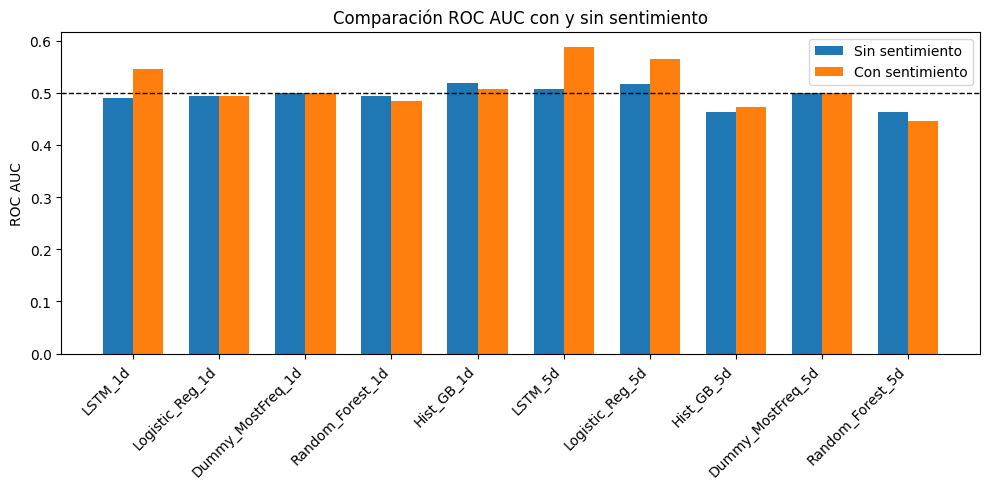

In [ ]:
import numpy as np

# Gráfica 2: ROC con vs sin sentimiento

labels = df_comp["modelo"] + "_" + df_comp["horizonte"]
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 5))

plt.bar(x - width/2, df_comp["ROC_no_sent"], width, label="Sin sentimiento")
plt.bar(x + width/2, df_comp["ROC_sent"], width, label="Con sentimiento")

plt.axhline(0.5, color="black", linestyle="--", linewidth=1)

plt.ylabel("ROC AUC")
plt.title("Comparación ROC AUC con y sin sentimiento")

plt.xticks(x, labels, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()
